## Introduction

##### The chosen topic is to test the theory on whether the students test score is affected by the following three factors, such as:
##### 1. The test score is different by the gender of the students: to test the hypotesis whether the gender factor plays a role on the performance of students
##### 2. Does the test preperation course has an effect on the overall score of the subjects
##### 3. Does parental level of education plays a role in the test scores

##### An analysis have been done on the above mentioned hypothesis where charts were used to visualize the data comparison

### Questions:
##### 1. Is there a difference in the average scores of math, reading, and writing between male and female students?
##### 2. Is there a relation between the test preperation course and the scores?
##### 3. Is there a relationship between the parental level of education and scores?

### Start of Analysis

In [4]:
import pandas as pd

In [6]:
students_per= pd.read_csv("StudentsPerformance.csv")
#Rename of the file

In [8]:
students_per.info()
#we used the informations function to visualize the data we have 
#in order to view whether the data requires cleaning or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data Cleaning

In [11]:
students_per= students_per.drop(columns=['race/ethnicity','lunch'])
# we removed two columns that are not related to the Problem Statement (Race/Ethnicity & Lunch)

In [13]:
students_per.info()
# we used the function again to confirm that the columns have been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   test preparation course      1000 non-null   object
 3   math score                   1000 non-null   int64 
 4   reading score                1000 non-null   int64 
 5   writing score                1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


#### 1. Is there a difference in the average scores of math, reading, and writing between male and female students?

In [16]:
cols_to_see1 = ["gender", "math score","reading score","writing score"]
students_per.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
# this method use to calculate the average of score of math , reading and writing according to gender (male & female)

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [18]:
# import the library i need to built the chart
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
average_scores = students_per.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

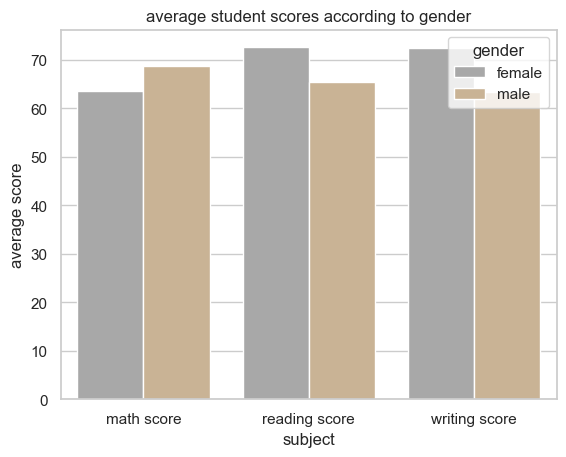

In [20]:
# convert the table to sutablr form for drawing
average_scores_melted = average_scores.melt(id_vars='gender', 
                                             var_name='Subject', 
                                             value_name='Average Score')

custom_palette = {
    'female': '#A8A8A8',
    'male': 'tan'
}

# draw the chart
sns.set(style="whitegrid")
sns.barplot(data=average_scores_melted, x='Subject', y='Average Score', hue='gender',palette=custom_palette)

plt.title('average student scores according to gender')
plt.ylabel('average score')
plt.xlabel('subject')
plt.legend(title='gender')
plt.show()

In [24]:
## Do the independent t-test in to compare performance between genders for math score
## First import required libraries
from scipy.stats import ttest_ind

## Then split the scores by gender
male_math_gender = students_per[students_per['gender'] == 'male']['math score']
female_math_gender = students_per[students_per['gender'] == 'female']['math score']

## Run the independent t-test
t_stat, p_value = ttest_ind(male_math_gender, female_math_gender, equal_var=False)  # Welch's t-test is safer when variances differ

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 5.398000564160736
P-value: 8.420838109090415e-08


In [26]:
## repeat the same code for reading score
ttest_ind(
    students_per[students_per['gender'] == 'male']['reading score'],
    students_per[students_per['gender'] == 'female']['reading score'],
    equal_var=False
)

TtestResult(statistic=-7.9683565184844, pvalue=4.3762967534977204e-15, df=996.3597383234206)

In [28]:
## repeat the same code for writing score
ttest_ind(
    students_per[students_per['gender'] == 'male']['writing score'],
    students_per[students_per['gender'] == 'female']['writing score'],
    equal_var=False
)


TtestResult(statistic=-9.997718973491885, pvalue=1.711809371849699e-22, df=997.534347771568)

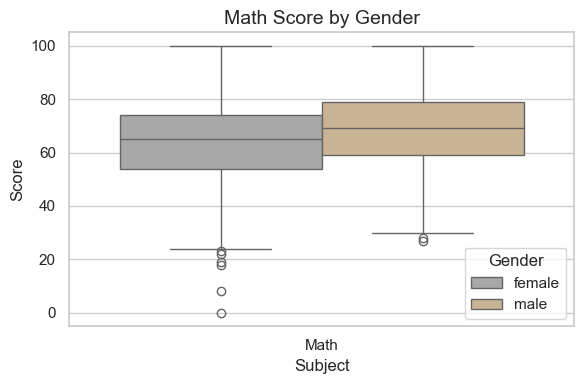

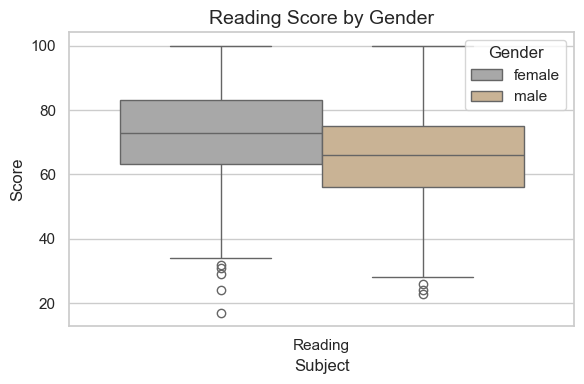

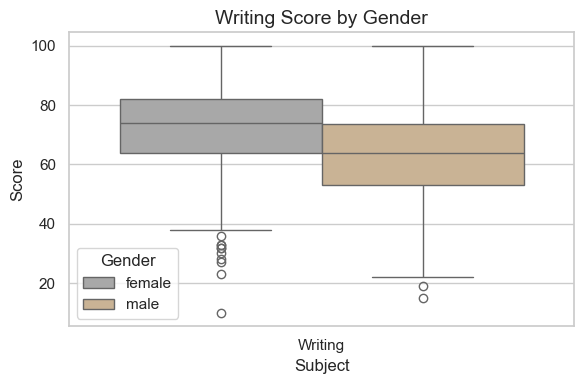

In [21]:
## draw a boxplot to visualize the previous finding by :
## first import the library i need 
import matplotlib.pyplot as plt
import pandas as pd

# define the colunm of gender & scores
scores_math_gender = students_per[['gender', 'math score']].copy()

# rename the column
scores_math_gender = scores_math_gender.rename(columns={'math score': 'Score'})
scores_math_gender['Subject'] = 'Math'

# change the color of boxs
custom_palette = {
    'female': '#A8A8A8',
    'male': 'tan'
}

sns.set(style="whitegrid")

# draw the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=scores_math_gender, x='Subject', y='Score', hue='gender', palette=custom_palette)

plt.title("Math Score by Gender", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

###################################################################################################
## repeat the same code for other subject ##
scores_reading_gender = students_per[['gender', 'reading score']].copy()
scores_reading_gender = scores_reading_gender.rename(columns={'reading score': 'Score'})
scores_reading_gender['Subject'] = 'Reading'

custom_palette = {
    'female': '#A8A8A8',
    'male': 'tan'
}

sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
sns.boxplot(data=scores_reading_gender, x='Subject', y='Score', hue='gender', palette=custom_palette)

plt.title("Reading Score by Gender", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()
####################################################################################################
scores_writing_gender = students_per[['gender', 'writing score']].copy()
scores_writing_gender = scores_writing_gender.rename(columns={'writing score': 'Score'})
scores_writing_gender['Subject'] = 'Writing'

custom_palette = {
    'female': '#A8A8A8',
    'male': 'tan'
}

sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
sns.boxplot(data=scores_writing_gender, x='Subject', y='Score', hue='gender', palette=custom_palette)

plt.title("Writing Score by Gender", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

#### 2. Is there a relation between the test preperation course and the scores and who score the highest and between both geders?

In [24]:
cols_to_see = ["test preparation course", "math score","reading score","writing score"]

students_per[cols_to_see].groupby(["test preparation course"]).mean()
# this was used to view the effect on test scores of those who have completed the test preperation course and didn't in general

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [25]:
cols_to_see = ["test preparation course", "math score", "reading score", "writing score"]
grouped_scores = students_per[cols_to_see].groupby("test preparation course").mean().reset_index()

In [28]:
grouped_scores_melted = grouped_scores.melt(id_vars='test preparation course', 
                                            var_name='Subject', 
                                            value_name='Average Score')

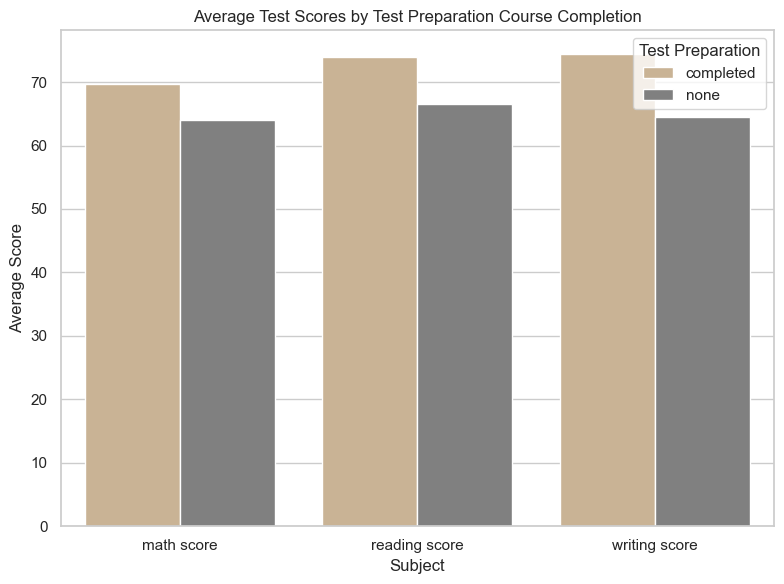

In [29]:
custom_palette = {
    'none': '#A8A8A8',
    'completed': 'tan'
}


sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(data=grouped_scores_melted, 
            x="Subject", 
            y="Average Score", 
            hue="test preparation course",
            palette=custom_palette)

plt.title("Average Test Scores by Test Preparation Course Completion")
plt.ylabel("Average Score")
plt.xlabel("Subject")
plt.legend(title="Test Preparation")
plt.tight_layout()
plt.show()

In [30]:
## Do the independent t-test in to compare performance between test preparation course for math score
## First import required libraries
from scipy.stats import ttest_ind

## Then split the scores test preparation course
none_math_preparation = students_per[students_per['test preparation course'] == 'none']['math score']
completed_math_preparation = students_per[students_per['test preparation course'] == 'completed']['math score']

## Run the independent t-test
t_stat, p_value = ttest_ind(none_math_preparation, completed_math_preparation, equal_var=False)  # Welch's t-test is safer when variances differ

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -5.786983157907755
P-value: 1.0425616722069513e-08


In [31]:
## repeat the same code for reading score
ttest_ind(
    students_per[students_per['test preparation course'] == 'none']['reading score'],
    students_per[students_per['test preparation course'] == 'completed']['reading score'],
    equal_var=False
)

TtestResult(statistic=-8.004132353965, pvalue=4.388808024290596e-15, df=775.3693595698406)

In [32]:
## repeat the same code for writing score
ttest_ind(
    students_per[students_per['test preparation course'] == 'none']['writing score'],
    students_per[students_per['test preparation course'] == 'completed']['writing score'],
    equal_var=False
)

TtestResult(statistic=-10.752510233886923, pvalue=2.662740173941066e-25, df=811.1258369481963)

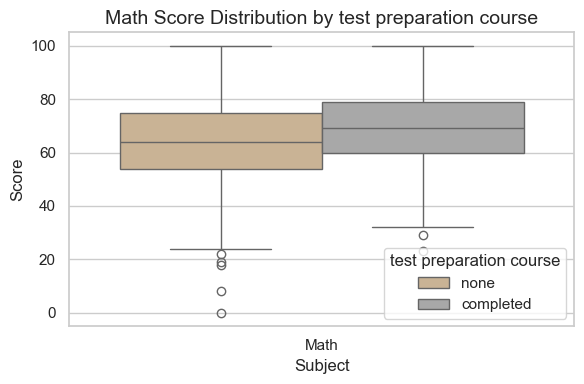

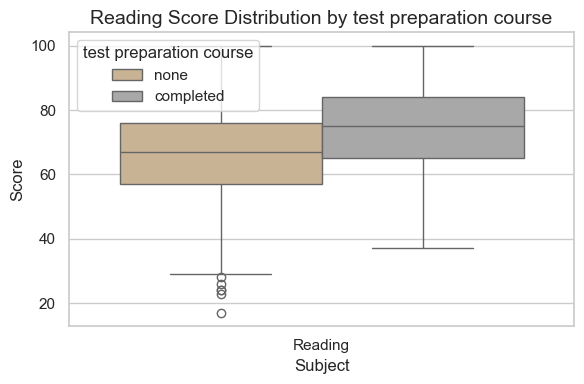

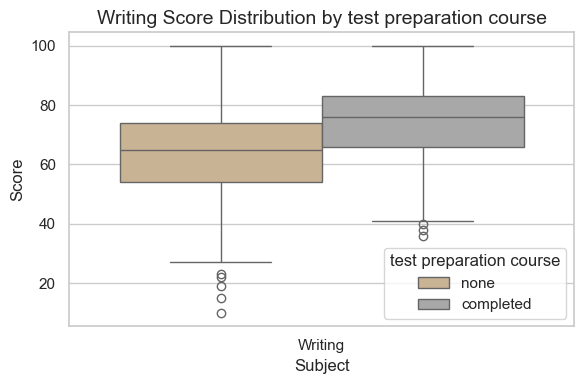

In [37]:
scores_math_preparation = students_per[['test preparation course', 'math score']].copy()

# rename the column
scores_math_preparation = scores_math_preparation.rename(columns={'math score': 'Score'})
scores_math_preparation['Subject'] = 'Math'

# change the color of boxs
custom_palette = {
    'none': 'tan',
    'completed': '#A8A8A8'
}

sns.set(style="whitegrid")

# draw the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=scores_math_preparation, x='Subject', y='Score', hue='test preparation course', palette=custom_palette)

plt.title("Math Score Distribution by test preparation course", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="test preparation course")
plt.tight_layout()
plt.show()

###################################################################################################
## repeat the same code for other subject ##
scores_reading_preparation = students_per[['test preparation course', 'reading score']].copy()
scores_reading_preparation = scores_reading_preparation.rename(columns={'reading score': 'Score'})
scores_reading_preparation['Subject'] = 'Reading'

custom_palette = {
    'none': 'tan',
    'completed': '#A8A8A8'
}

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.boxplot(data=scores_reading_preparation, x='Subject', y='Score', hue='test preparation course', palette=custom_palette)

plt.title("Reading Score Distribution by test preparation course", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="test preparation course")
plt.tight_layout()
plt.show()
####################################################################################################
scores_writing_preparation = students_per[['test preparation course', 'writing score']].copy()
scores_writing_preparation = scores_writing_preparation.rename(columns={'writing score': 'Score'})
scores_writing_preparation['Subject'] = 'Writing'

custom_palette = {
    'none': 'tan',
    'completed': '#A8A8A8'
}

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.boxplot(data=scores_writing_preparation, x='Subject', y='Score', hue='test preparation course', palette=custom_palette)

plt.title("Writing Score Distribution by test preparation course", fontsize=14)
plt.xlabel("Subject", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="test preparation course")
plt.tight_layout()
plt.show()

##### 3. Is there a relationship between the parental level of education and scores?

In [39]:
cols_to_see =["parental level of education", "math score"]
students_per[cols_to_see].groupby(["parental level of education"]).mean().sort_values(by='math score')

,math score
parental level of education,
high school,62.137755
some high school,63.497207
some college,67.128319
associate's degree,67.882883
bachelor's degree,69.389831
master's degree,69.745763


In [40]:
def avg(scores):
    return sum(scores)/3

In [41]:
#students_per.columns
students_per['avg score'] = students_per[['math score', 'reading score', 'writing score']].apply(avg, axis=1)

In [42]:
students_per

,gender,parental level of education,test preparation course,math score,reading score,writing score,avg score
0,female,bachelor's degree,none,72,72,74,72.666667
1,female,some college,completed,69,90,88,82.333333
2,female,master's degree,none,90,95,93,92.666667
3,male,associate's degree,none,47,57,44,49.333333
4,male,some college,none,76,78,75,76.333333
...,...,...,...,...,...,...,...
995,female,master's degree,completed,88,99,95,94.000000
996,male,high school,none,62,55,55,57.333333
997,female,high school,completed,59,71,65,65.000000
998,female,some college,completed,68,78,77,74.333333


In [43]:
cols_to_see =["parental level of education", "math score", "reading score", "writing score", "avg score"]
temp = students_per[cols_to_see].groupby(["parental level of education"]).mean().sort_values(by='avg score').reset_index()
temp

,parental level of education,math score,reading score,writing score,avg score
0,high school,62.137755,64.704082,62.448980,63.096939
1,some high school,63.497207,66.938547,64.888268,65.108007
2,some college,67.128319,69.460177,68.840708,68.476401
3,associate's degree,67.882883,70.927928,69.896396,69.569069
4,bachelor's degree,69.389831,73.000000,73.381356,71.923729
5,master's degree,69.745763,75.372881,75.677966,73.598870


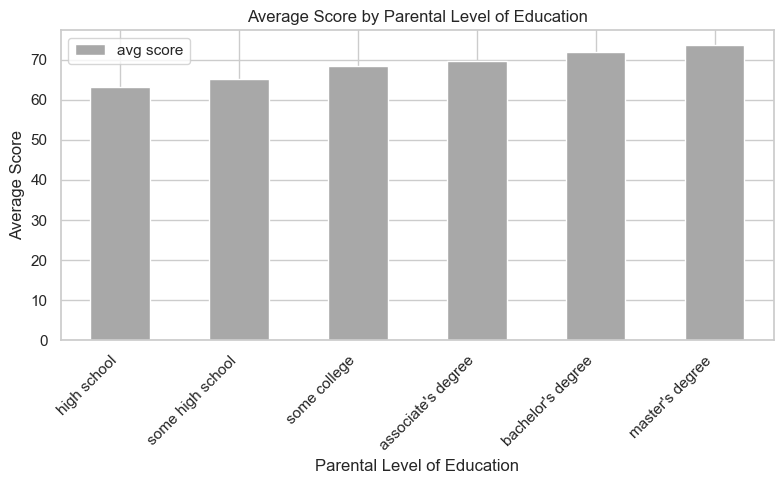

In [47]:
temp.plot(
    kind="bar",
    x="parental level of education",
    y="avg score",
    color='#A8A8A8',  
    figsize=(8, 5)    
)

import matplotlib.pyplot as plt
plt.title("Average Score by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


## Conclusion - findings & Recommendation (to be filled after we are done from the analysis)

##### 1. Based on the results of the independent t-tests comparing test prepartion course & male and female students’ performance in math, reading, and writing:

##### - There is no significant difference between test prepartion course & male and female students’ scores in any of the three subjects.


##### - The data research collectively suggest that higher parental education levels positively influence students' academic achievements. This is showing the importance of parental educational background to shape the students success.